### Create KNNClassifier with 5 neighbors, working with Iris-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 8)

In [2]:
#secondary functions
def plot_decision_regions(x, y, model):
    colors = [
        '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
        '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
        '#bcbd22', '#17becf']
    
    plt.scatter(x[:, 0][y < 0.5], x[:, 1][y < 0.5], s=10)
    plt.scatter(x[:, 0][y > 0.5], x[:, 1][y > 0.5], s=10)

    a = np.linspace(x[:, 0].min() - 0.5, x[:, 0].max() + 0.5, 100)
    b = np.linspace(x[:, 1].min() - 0.5, x[:, 1].max() + 0.5, 100)
    A, B = np.meshgrid(a, b)
    points = np.stack([A, B], 2).reshape((100 * 100, 2))
    y_hat = model.predict(points).reshape((100, 100))

    plt.contourf(a, b, y_hat, alpha=0.25, colors=colors, levels=np.arange(np.max(y_hat) + 2) - 0.5)    
    plt.show()

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(A, B, y_hat, cmap=cm.coolwarm)
    plt.colorbar(surf)
    plt.show()

### 1. Реализуйте функцию `accuracy` для измерения точности классификации

In [3]:

def accuracy(y , y_hat):    
    return (y == y_hat).mean() 
   

In [4]:

class ZNormalizer(object):
    def fit(self, x):
        self.std = np.std(x, 0)
        self.M = np.mean(x, 0)
    
    def transform(self, x):
        x = (x - self.M) / self.std
        return x
     

In [5]:

class KNNClassifier(object):
    def __init__(self, k):
        self.k = k
    
    def fit(self, x, y):
        self.x = x
        self.y = y
        print(x.shape)
        
    def predict(self, x_pred):
        x_pred = np.expand_dims(x_pred, 1)
        x_train = np.expand_dims(self.x, 0)
        
        delta = x_pred - x_train
        delta = np.sqrt((delta**2).sum(2))
        
        y_hat = np.zeros(delta.shape[0])

        
        for i in range(delta.shape[0]):
            sumtrue = 0
            sumfalse = 0
            ind = np.argsort(delta[i,:])[:self.k]
            
            for n in ind:
                if self.y[n] == True:
                    sumtrue = sumtrue + 1
                else:
                    sumfolse = sumfalse + 1
                    
            if sumtrue > sumfalse:
                y_hat[i] = True
            else:
                y_hat[i] = False
                
        return y_hat
    

In [6]:

data = pd.read_csv('./Iris.csv')
data = data.iloc[(data['Species'] != 'Iris-setosa').values]

x = data [['PetalLengthCm', 'PetalWidthCm']].values
y = (data['Species'] == 'Iris-virginica').values

In [7]:

i = np.random.permutation(x.shape[0])
x = x[i]
y = y[i]

x_train = x[:60]
y_train = y[:60]

x_test = x[60:]
y_test = y[60:]

In [8]:
#имелось ввиду тренируем (через fit) на тренировочных и предсказываем, считаем точность,
#строим графики на тестовых (через predict)
#построй график на тестовых и посчитай accuracy на тестовых
normalizer = ZNormalizer()
normalizer.fit(x_train)

x = normalizer.transform(x)
x_train = normalizer.transform(x_train)
x_test = normalizer.transform(x_test)

model = KNNClassifier(k=5)
model.fit(x_train, y_train)
y_hat_test = model.predict(x_test)

print('acc: {}'.format((y_test == y_hat_test).mean()))

(60, 2)
acc: 0.95


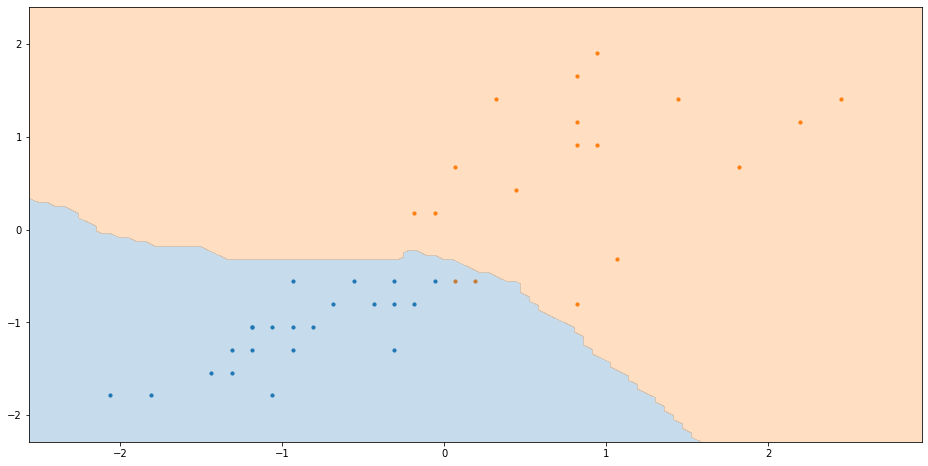

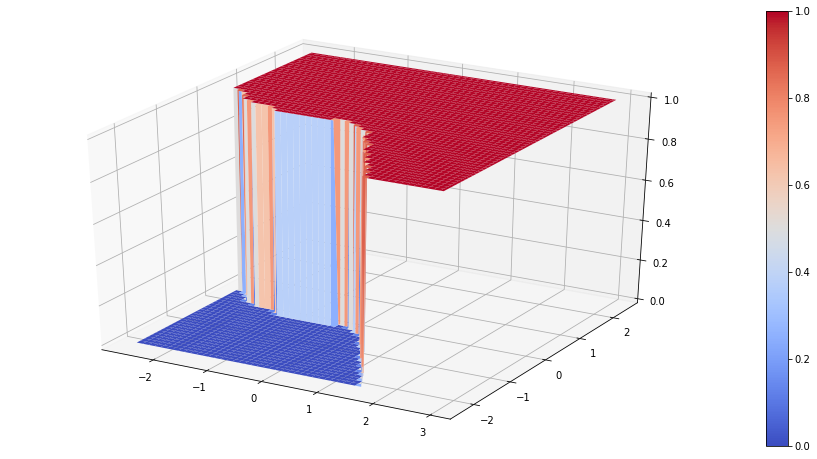

In [11]:
plot_decision_regions(x_test, y_test, model)